In [1]:
import numpy as np
import matplotlib.pyplot as plt # used to generate graphs
import seaborn as sns # used for plotting maps
%matplotlib inline

In [2]:
def plot_graphs(mse_history,iter,df): # used for plotting MSE graph
  fig, ax_mse = plt.subplots()
  ax_mse.plot(range(iter), mse_history, label='Mean Square Error', color='red')
  ax_mse.set_xlabel('Iterations')
  ax_mse.set_ylabel('Mean Squared Error')
  ax_mse.set_title('MSE during Training')
  ax_mse.legend(loc='upper right')

  plt.show()
  li = ["age" ,     "bmi",  "children" , "sex_male" , "smoker_yes" ,"region_northwest" , "region_southeast",  "region_southwest"]
  # plot regression line with feature points using seaborn library
  sns.pairplot(df, x_vars=li, y_vars='charges', size=7, aspect=0.7, kind='reg')

In [3]:
# Pull a list of the column names of the categorical variables
from sklearn.preprocessing import LabelEncoder

def create_dummy_df(df, cat_cols, dummy_na):
    le = LabelEncoder()
    for col in  cat_cols:
        try:
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [4]:
import pandas as pd

def get_data(train_link):
  # test_data = pd.read_csv(test_link)
  train_data = pd.read_csv(train_link)
  # test_data = test_data.dropna(subset = ['education'],how='any')
  train_data = train_data.dropna(subset = [],how='any')
  cat_df = train_data.select_dtypes(include=['object']) #finding list of categorical features
  cat_df = train_data.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns
  cat_df.shape[1]
  cat_cols_lst = cat_df.columns
  train_df = create_dummy_df(train_data, cat_cols_lst, dummy_na=False) #Created new dataframe

  #separating labels and features
  op = "charges"
  y_train = train_df[op]
  x_train = train_df.drop(columns=[op])
  return x_train.values,y_train.values,train_df

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#created Linear regression class that will act as model
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.mse_history = []  # To store MSE values during training
    #Based on weight bias and features, generating labels
    def line_equation(self,X):
      return np.dot(X, self.weights) + self.bias
    #Calculating gradient of weight
    def grad_w(self,n,X,y):
      return (1 / n) * np.dot(X.T, (self.line_equation(X) - y))
    #Calculating gradient of bias
    def grad_b(self,n,X,y):
      return (1 / n) * np.sum(self.line_equation(X) - y)
    #Fitting the model
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.random.rand(num_features)  # Initialize weights with random values
        self.bias = np.random.rand()
        #for each iteration adjusting weight and bias through gradient descent approach and storing MSE for plotting of graph
        for _ in range(self.n_iterations):
            self.weights -= self.learning_rate * self.grad_w(num_samples,X,y)
            self.bias -= self.learning_rate * self.grad_b(num_samples,X,y)
            mse = np.mean((y - self.line_equation(X)) ** 2)
            self.mse_history.append(mse)
    #Based on trained weight and bias, predicting labels for feature vectors
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return linear_model

In [6]:
def exp():
  X,y,df = get_data('insurance.csv')
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0)
  X = (X - mean) / std
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  # Create and train the linear regression model
  learning_rates = [0.1,0.001,0.0001]
  for rate in learning_rates:
    model = LinearRegression(learning_rate=rate, n_iterations=1000)
    model.fit(X_train, y_train)

    final_y_pred = model.predict(X)
    mse = np.mean((y - final_y_pred) ** 2)
    print(mse)
    plot_graphs(model.mse_history,model.n_iterations,df)


36605805.10594535


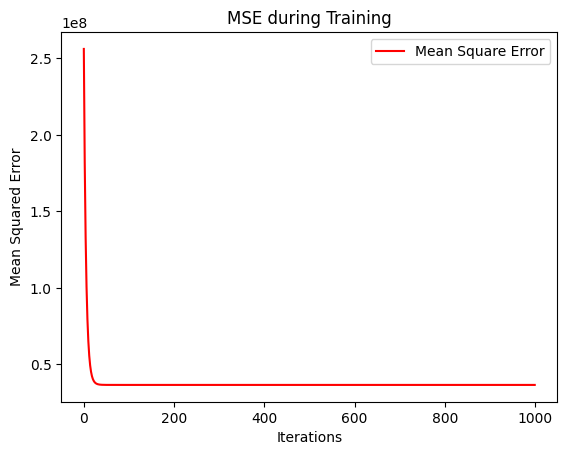

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


79721345.1625953


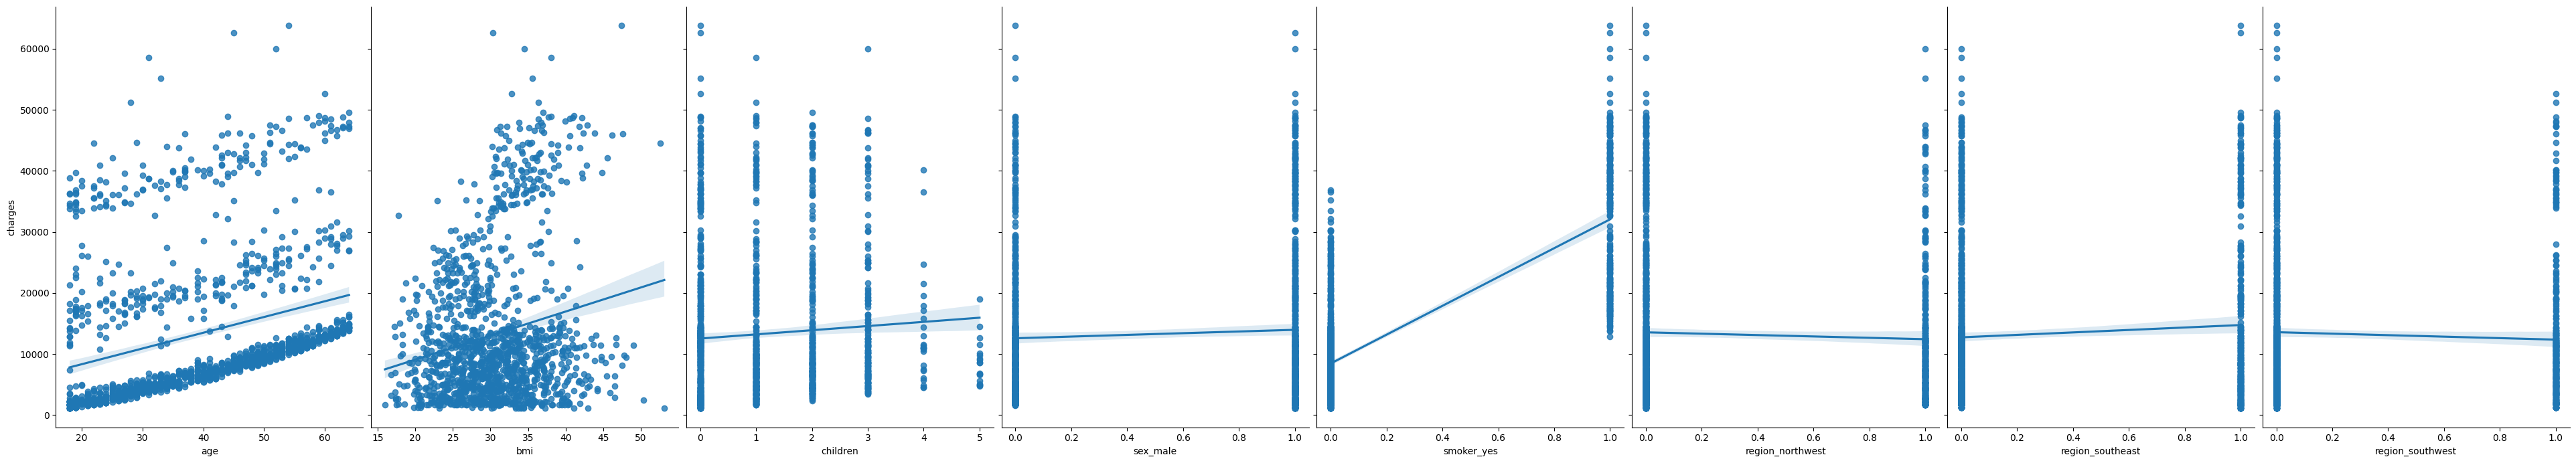

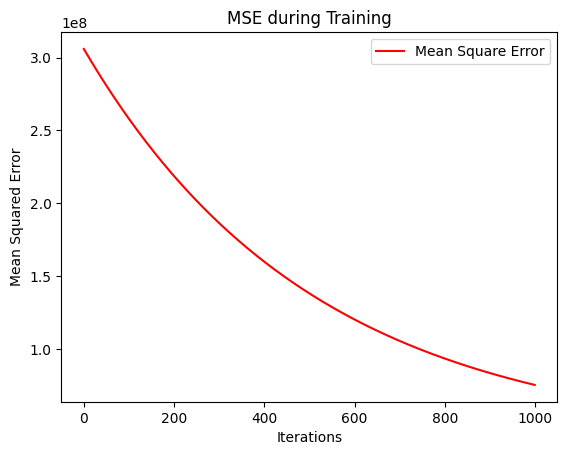

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


272456065.12121755


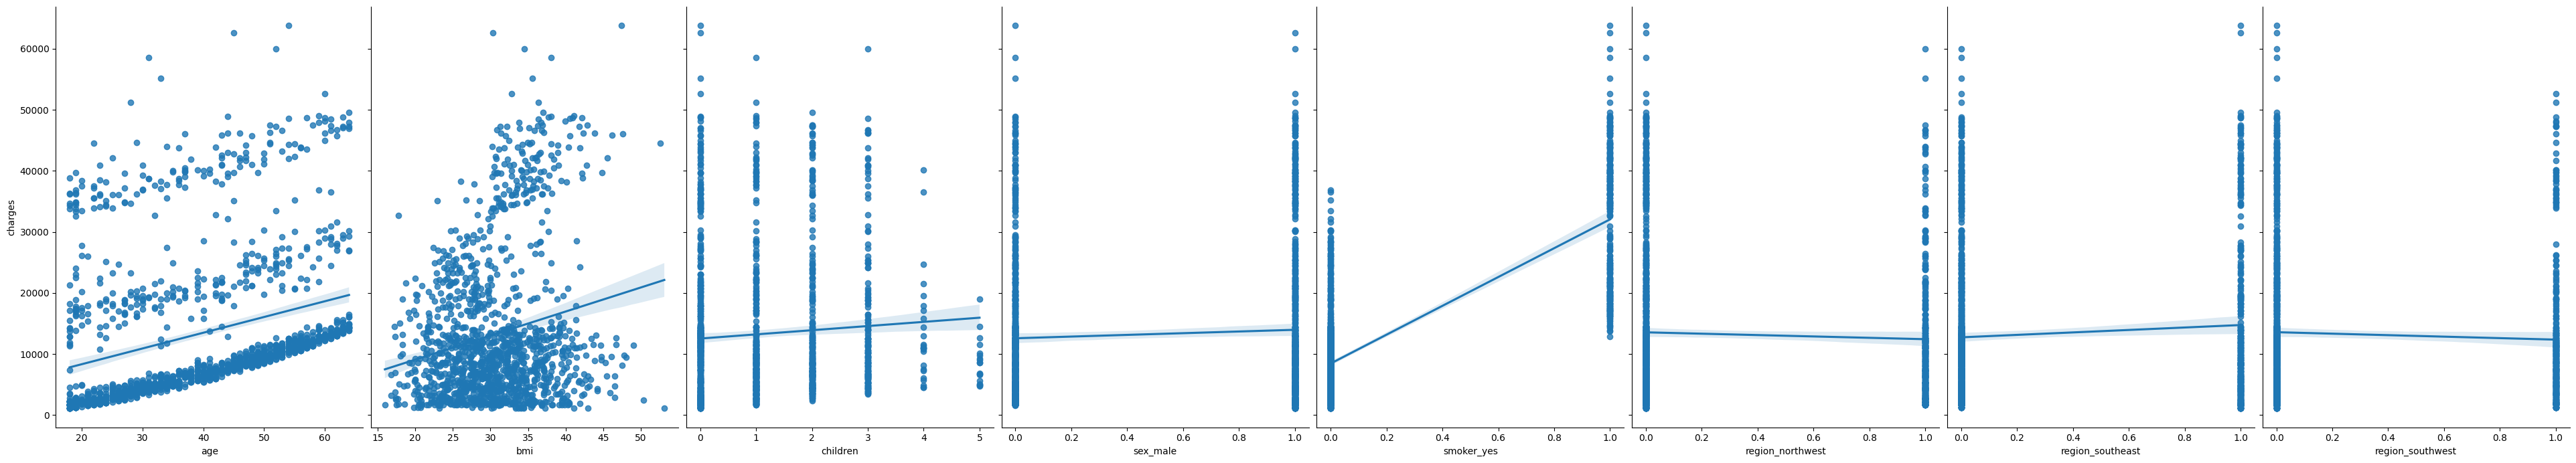

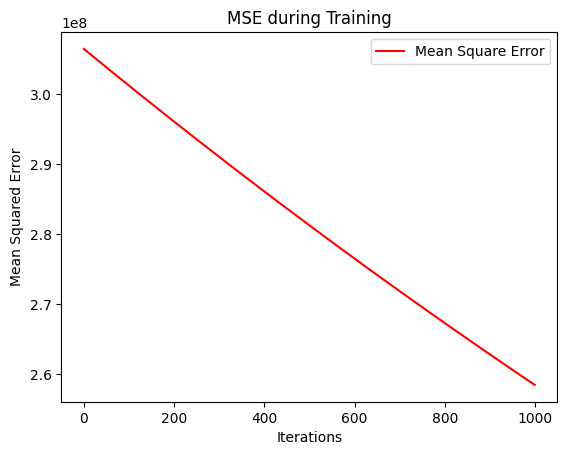

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


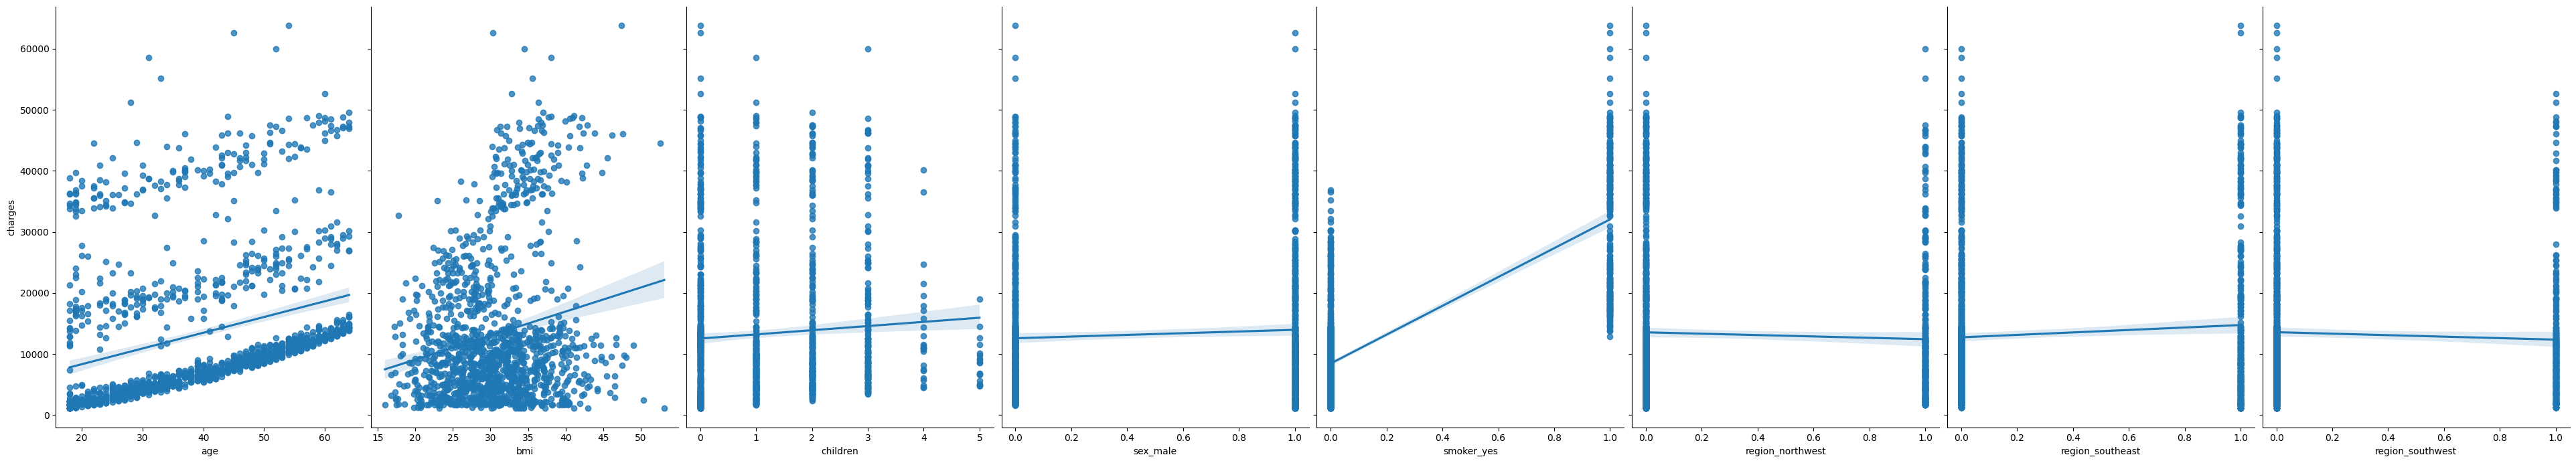

In [7]:
exp()